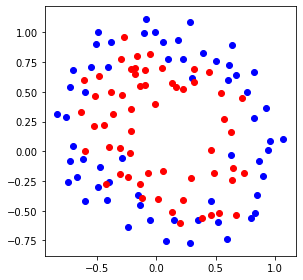

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Write down the high dimensional function

$g(x, y; \theta) = \theta_{0} + \theta_{1} * x + \theta_{2} * x^{2} + \theta_{3} * y + \theta_{4} * y^{2}   $

In [71]:
def g(t0, t1, t2, t3, t4,t5,t6,t7,t8,t9, x, y):
    return t0 + t1 * x + t2 * (x ** 2) + t3 * y + t4 * (y ** 2) + t5 * x*y + t6 * (x**2)*(y**2) + t7 * (x**1/2)+ t8 * (y**1/2) + t9 * (x**1/2) * (y**1/2)


def sig(z):
    return 1 / (1 + np.exp(-z))
    
    
def obj(t0, t1, t2, t3, t4,t5,t6,t7,t8,t9, X, Y, m):
    error = 0
    eps = 1e-12
    for i in range(m):
        error += (label[i] * np.log(1/(eps+sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,X[i],Y[i]))))) + ((1-label[i]) * np.log(1/(eps+1-sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,X[i],Y[i])))))
    
    error = error / m
    return error
    
def gradient(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,X,Y,m,lr):
    temp = 0
    for i in range(m):
        temp += sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,X[i],Y[i]))-label[i]
    temp = temp / m
    new_t0 = t0 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,X[i],Y[i]))-label[i])*X[i]
    temp = temp / m
    new_t1 = t1 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,X[i],Y[i]))-label[i])*(X[i] ** 2)
    temp = temp / m
    new_t2 = t2 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,X[i],Y[i]))-label[i])*Y[i]
    temp = temp / m
    new_t3 = t3 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,X[i],Y[i]))-label[i])*(Y[i] ** 2)
    temp = temp / m
    new_t4 = t4 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,X[i],Y[i]))-label[i])*(X[i]*Y[i])
    temp = temp / m
    new_t5 = t5 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,X[i],Y[i]))-label[i])*(Y[i] ** 2)*(X[i]**2)
    temp = temp / m
    new_t6 = t6 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,X[i],Y[i]))-label[i])*(X[i]**1/2)
    temp = temp / m
    new_t7 = t7 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,X[i],Y[i]))-label[i])*(Y[i] ** 1/2)
    temp = temp / m
    new_t8 = t8 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,X[i],Y[i]))-label[i])*(X[i]**1/2)*(Y[i] ** 1/2)
    temp = temp / m
    new_t9 = t9 - lr * temp
    
    return new_t0, new_t1, new_t2, new_t3, new_t4, new_t5, new_t6, new_t7, new_t8, new_t9

def acc(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,X,Y,m):
    score = 0
    for i in range(m):
        if g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,X[i],Y[i]) >= 0 and label[i] == 1:
            score += 1
        elif g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,X[i],Y[i]) < 0 and label[i] == 0:
            score += 1
    return score / m

# Plot the train error

In [105]:
m = len(label)
lr = 0.01
itermax = 10000
itercount = 0
loss = []
accuracy = []
t0,t1,t2,t3,t4,t5,t6,t7,t8,t9 = np.random.randn(10)
print(acc(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,pointX,pointY,m))
while True:
    
    if itercount > itermax:
        break
    loss.append(obj(t0, t1, t2, t3, t4,t5,t6,t7,t8,t9, pointX, pointY, m))
    accuracy.append(acc(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,pointX,pointY,m))
    t0,t1,t2,t3,t4,t5,t6,t7,t8,t9 = gradient(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,pointX,pointY,m,lr)
    itercount += 1
    

0.5


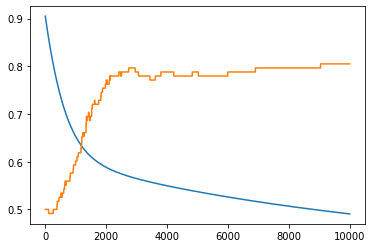

In [106]:
step = [i for i in range(itercount)]
plt.plot(step, loss)
plt.plot(step, accuracy)

In [107]:
t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11

(1.4478820846105107,
 0.3330025886426318,
 -3.4537798346330124,
 -0.07765350805876711,
 -2.7452436873840185,
 -0.9319210170907798,
 -1.2056697967002288,
 0.3534212638088175,
 1.8487691614895698,
 -0.5119511796620442,
 -0.6339413331661264,
 0.7360122592716526)

In [108]:
accuracy[-1]

0.8050847457627118

In [102]:
itercount

7546

In [103]:
loss[-1]

0.5113526611280496

In [104]:
loss[-2]

0.5113626606427207